In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import timeit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("default", category=DataConversionWarning)

# EDA

- feat selection _impact on target
- imputaion technique

In [2]:
eda_df=pd.read_csv("filEs/cleaned_data.csv")
eda_df.tail()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,weather,road_traffic,...,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day,distance
45497,JAP,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,...,Metropolitian,32,24,3,Thursday,0,10.0,11.0,morning,1.489846
45498,AGR,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,Jam,...,Metropolitian,36,16,2,Wednesday,0,15.0,19.0,evening,NaN
45499,CHEN,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,...,Metropolitian,16,11,3,Friday,0,-1425.0,23.0,night,4.657195
45500,COIMB,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,...,Metropolitian,26,7,3,Monday,0,5.0,13.0,afternoon,6.232393
45501,RANCHI,23.0,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,Fog,Medium,...,Metropolitian,36,2,3,Wednesday,0,5.0,17.0,evening,12.074396


In [3]:
eda_df.shape

(45502, 25)

In [4]:
from matplotlib.gridspec import GridSpec
# import data_clean_utils  


In [5]:
missingrows=eda_df.isna().any(axis=1).sum()
print("total rows with missing data: ",missingrows),missingrows*100/eda_df.shape[0]

total rows with missing data:  7438


(None, 16.34653421827612)

##### missingness increased due to nan imputaion in zero value in location 

In [6]:
# eda_df.Vehicle_condition=eda_df.Vehicle_condition.astype("category")
numerical_cols=eda_df.columns[[1,2,3,4,5,6,16,21,24]].tolist()
categorical_cols=[col for col in eda_df.columns.tolist() if col not in numerical_cols]
numerical_cols,len(numerical_cols),len(categorical_cols),categorical_cols


(['rider_age',
  'rider_rating',
  'Restaurant_latitude',
  'Restaurant_longitude',
  'Delivery_location_latitude',
  'Delivery_location_longitude',
  'Time_taken(min)',
  'pickup_time',
  'distance'],
 9,
 16,
 ['city_name',
  'Order_Date',
  'weather',
  'road_traffic',
  'Vehicle_condition',
  'Type_of_order',
  'Type_of_vehicle',
  'multiple_deliveries',
  'Festival',
  'City',
  'Day',
  'month',
  'day_of_week',
  'Weekend',
  'Time_Orderd_hour',
  'Time_Orderd_of_day'])

##### some cols num representation of cate values
cate cols having more %  then num cols 

In [7]:
eda_df.columns

Index(['city_name', 'rider_age', 'rider_rating', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'weather', 'road_traffic',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'Day',
       'month', 'day_of_week', 'Weekend', 'pickup_time', 'Time_Orderd_hour',
       'Time_Orderd_of_day', 'distance'],
      dtype='object')

In [8]:
eda_df[numerical_cols].describe()

,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),pickup_time,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,26.297591,-17.292531,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,9.386419,196.119394,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000,-1435.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,19.000000,5.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,26.000000,10.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,32.000000,15.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000,15.000000,20.969489


In [9]:
eda_df.describe(include=["object","category"]).T

,count,unique,top,freq
city_name,45502,22,JAP,3439
Order_Date,45502,44,2022-03-15,1190
weather,44977,6,Fog,7654
road_traffic,44992,4,Low,15477
Type_of_order,45502,4,Snack,11512
Type_of_vehicle,45502,4,motorcycle,26427
Festival,45274,2,No,44380
City,44304,3,Metropolitian,34029
day_of_week,45502,7,Wednesday,7077
Time_Orderd_of_day,45502,5,night,18312


<Axes: >

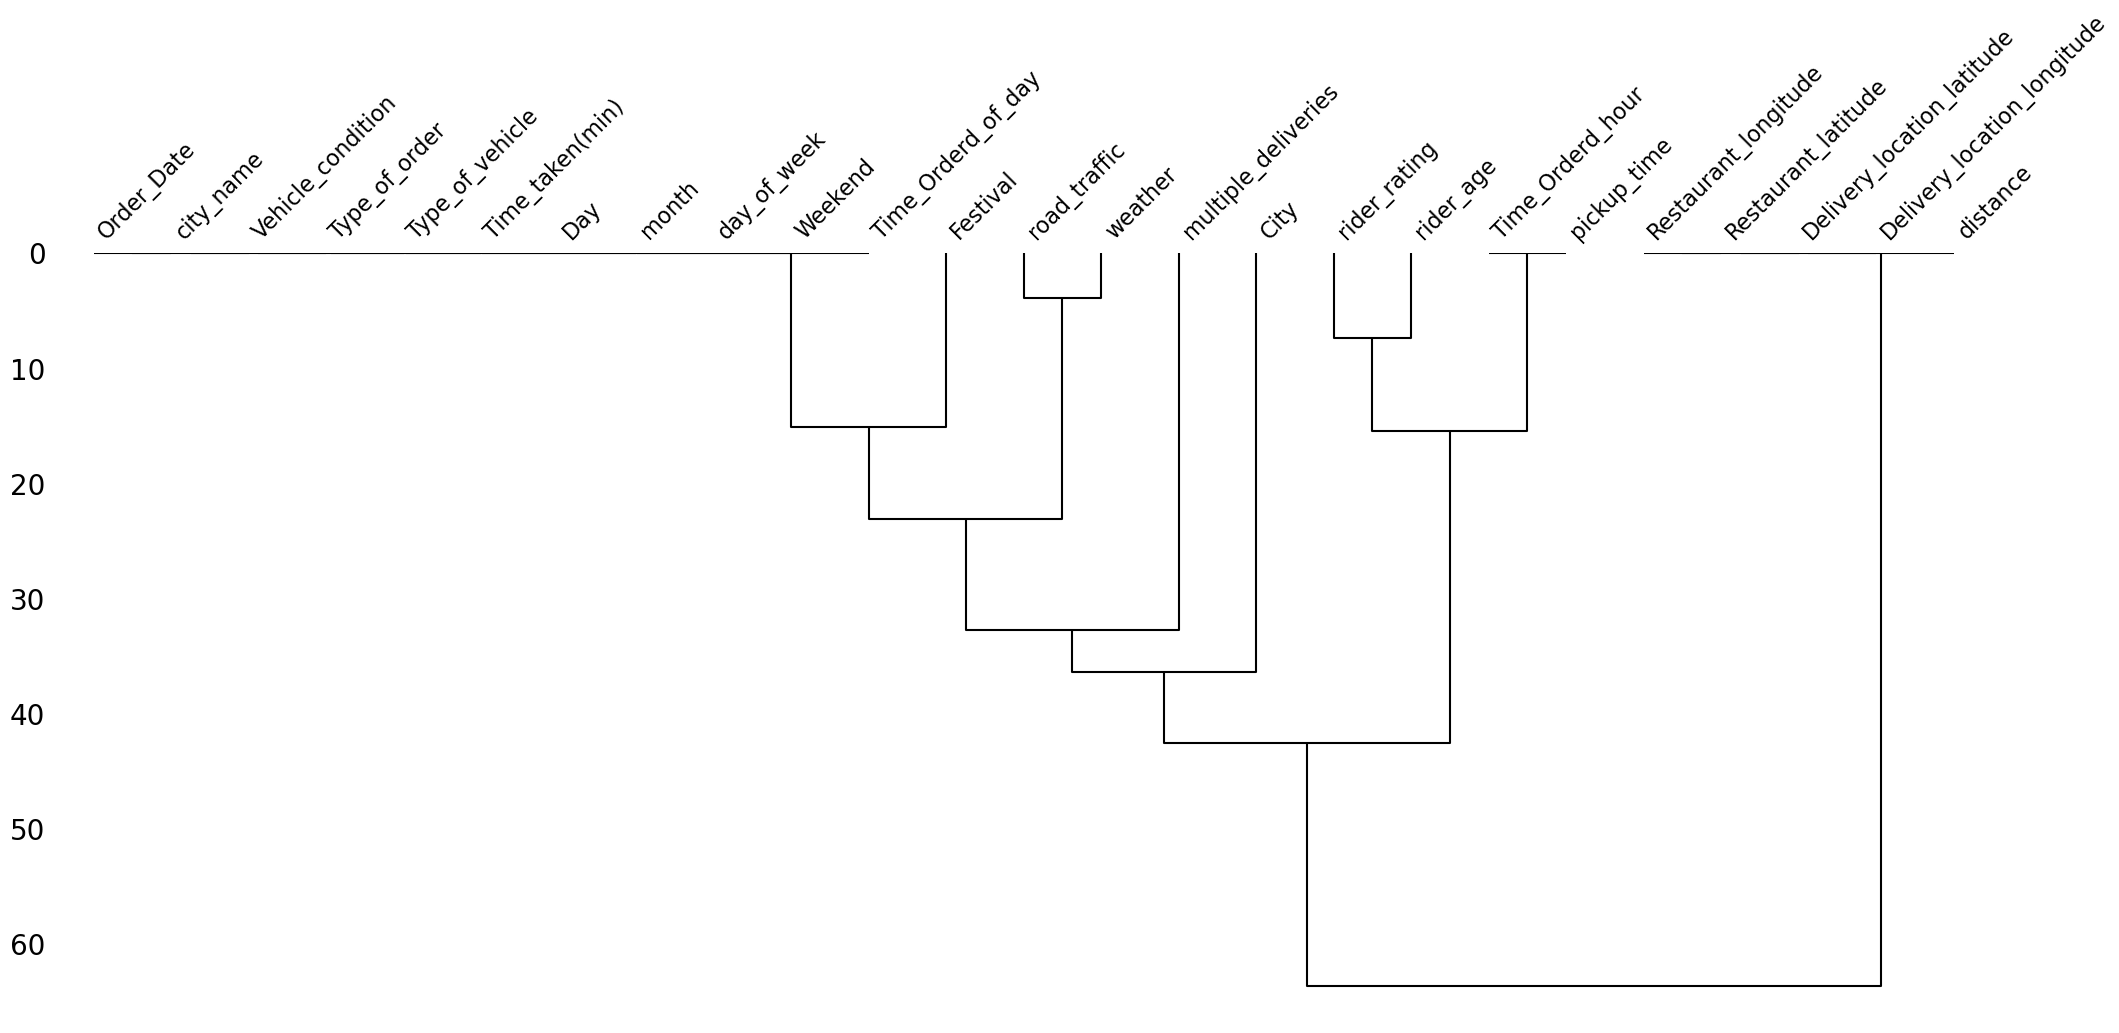

In [10]:
msno.dendrogram(eda_df)